In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('paper')

# Lecture 3: Basic Monte Carlo - Integration, sampling and error estimation
AM207: Pavlos Protopapas, Harvard University


##1. Buffon's needle

Before the actual `discovery' of the Monte Carlo method,  Georges-Louis Leclerc comte de Buffon in
1777 stated a problem involving dropping a needle on a lined surface.
Suppose we have a floor made of parallel strips of wood, each the same width, and we drop a needle onto the floor. What is the probability that the needle will lie across a line between two strips?
The solution, in the case where the needle length is not greater than the width of the strips, can be used to design a Monte Carlo-style method for approximating the number $\pi$.

![Buffon Needle](./Lecture03_data/Buffon_needle.gif)

Let $l$ be the length of the needle and $t$ the distance between two lines. We then ask the question
what is the probability that the needle dropped will cross a line. Let $x$ be the distance from the center 
of the needle to the closest line and $\theta$ the acute angle of the needle and that line ($0 \leq \theta \leq \pi/2$).
The normalized uniform probability density function of $x$ between $[0,t/2]$ is $2/t$. 
Similarly the probability density function of $\theta$ between $[0, \pi/2]$ is $2/\pi$.
As $x$ and $\theta$ are independent, the joint probability density function is $\frac{4}{t\pi}$.

If the length of the needle is smaller than the interline distance then the probability 
of crossing the line is given by the integral of the joint probability density 

$$ P = \int_{\theta=0}^{2\pi} \int_{x=0}^{l/2 \, \sin\theta} \frac{4}{t\pi} d\theta \, dx  = \frac{2l}{t \pi} $$

In this simple case, one can solve for $\pi$:

$$ \pi = \frac{2 \,l }{t \,P} $$

Therefore, if we conduct an experiment to estimate $P$, we will also have an estimate for $\pi$. 

For example, suppose we throw $n$ needles and we find that a subset $m$ of those
cross a line, then $P=m/n$, or $\pi =  \frac{2 \, l \, n}{t \, m}$

[This page](http://mste.illinois.edu/activity/buffon/) has a nice interactive applet to see Buffon's needle in action. 

Fun fact: It seemst hat ants use Buffon's needle to estimate sizes of potential nesting places (see [this article](http://beheco.oxfordjournals.org/content/12/6/655.full))

## 2. Monte Carlo

The term **Monte Carlo** really comes from the randomness inherent in the
method. It was invented by Metropolis and popularized by the pioneers in the
field: Metropolis, Ulam, Fermi, von Neumann, in 40's - 50's.

The most common use for Monte Carlo methods is the evaluation of integrals. This is
also the basis of Monte Carlo simulations (which are actually integrations). The basic
principles hold true in both cases. 

### Hit or miss method
The basic idea of the Monte Carlo integration becomes clear
from the  ``surviving in the desert"  example, where Mr. Anderson threw stones to estimate the area of the pond. 
In other words he integrated the area of an irregular domain:

He Threw rocks in the air, i.e. chose points randomly within a rectangular box surrounding the function:

$$ \hat{I} = \frac{N_{inside}}{N_{total}} A $$ 

where $\hat{I}$ is our estimate for the area under the curve (red in the illustration below), 
and $A$ is the area of the rectangular box we throw points into.

![rocks in a box](./Lecture03_data/MonteCarlo2.png)

This method has the drawback that we need to choose the size of our box wisely. If the box is too large, most of the random samples are outside the red area and we waste a lot of samples. If we make it too small we might not have the whole red area inside the box. 



### Hit-and-miss example: How to calculate the area of a cirlce
The area of a circle is computed as $A = \pi r^2$. So the area of a circle with radius one is $\pi$. And we can use Monte Carlo to estimate $\pi$ by estimating the area of a unit circle. 


Area of the circle =  3.14104
pi =  3.14104


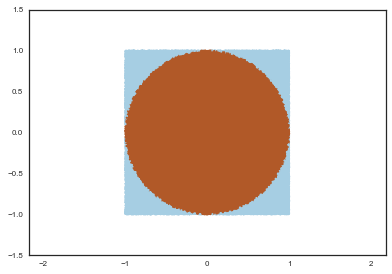

In [4]:
#plt.figure(figsize=(8,8))  # set the figure size

radius = 1

N = 100000  #Use 10000 points 
X = np.random.uniform(low=-radius, high=radius, size=N)  # Random numbers from -1 to 1
Y = np.random.uniform(low=-radius, high=radius, size=N)   

# calculate the distance from the center 
R = np.sqrt(X**2+Y**2);  

box_area =(2.0*radius)**2      # This is the big box 
is_point_inside = R<radius
N_inside=np.sum(is_point_inside)
circle_area = box_area*N_inside/N

plt.scatter(X,Y, c=is_point_inside, s=5.0, edgecolors='none', cmap=plt.cm.Paired)  
plt.axis('equal')
plt.legend()

print "Area of the circle = ", circle_area
print "pi = ", circle_area/radius**2

### Mean-value theorem
Consider 1-dimensional definite integral:

$$ I = \int_{a}^{b} f(x) \, dx $$

Recall that:

$$ \langle f \rangle = \frac{ \int_{\omega} f(x) dx }{ \int_{\omega} dx } $$

where $\omega$ defines the coverage. Let $\int_{\omega} dx =V $ then 

$$ \int_{a}^{b} f(x) \, dx = V \langle f \rangle   $$



The integral can be determined by the average value of the integrand
$f(x)$ in the range of $x$. 
To determine this average, we choose the $x_i$ at random  and sample the value of $f(x)$. For the one-dimensional integral above, the estimate $\hat{I}$ of the integral in the sample mean method is given by

$$\hat{I} = V \langle f \rangle  \approx V \frac{1}{N} \sum_{i=1}^{N} f(x_i) $$

and this estimation becomes exact as $N \rightarrow \infty$ as 

$$ \langle f \rangle = \lim_{N\rightarrow \infty} \sum_{i=1}^{N} f(x_i) $$

### Example: 

**Calculate the integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx. $**

We know from calculus that the anti-derivative is 
$$ \frac{x^3}{3} + 4\sin(x) -4x\cos(x). $$ 

To solve this using MC, we simply draw $N$ random numbers from 2 to 3 and then take the average of all the values $f(x)=x^2 + 4 \, x \,\sin(x)$ and normalized over the volume; in this case the volume is 1 (3-2=1). 

In [5]:
def f(x):
    return x**2 + 4*x*np.sin(x) 

def intf(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x) 

In [6]:
a = 2;    
b = 3; 

# use N draws 
N= 10000

#N values uniformly drawn from a to b 
X = np.random.uniform(low=a, high=b, size=N) 
Y = f(X)   # calculate f(X)

Imc= (b-a) * np.sum(Y)/ N;

exactval=intf(b)-intf(a)

print "Monte Carlo estimation=",Imc, "Exact number=", intf(b)-intf(a)


Monte Carlo estimation= 11.8055581223 Exact number= 11.8113589251


### Mutlidimensional integral. 
That is nice but how about the multidimensional case? In principle the method stays the same, but we need to make sure that our random samples fall inside the area we want to integrate over. 

### Example:
Calculate the two dimensional integral $I=\int \int f(x, y) dx dy$ where $f(x,y) = x^2 +y^2$ 
over the region deﬁned by the condition $x^2 +y^2 ≤ 1$. The steps are the same as above, but we need an additional check that the region condition is fulfilled by our random samples.








In [7]:
fmd = lambda x,y: x*x + y*y

In [8]:
# use N draws 
N= 8000
X= np.random.uniform(low=-1, high=1, size=N) 
Y= np.random.uniform(low=-1, high=1, size=N) 
Z=fmd(X, Y)   # calculate f(x) 

R = X**2 + Y**2

# reject all samples that do not satisfy our region condition
N = np.sum(R<1) 
sumsamples = np.sum(Z[R<1])

print "I=",np.pi*1.0*1.0*sumsamples/N, "actual", np.pi/2.0 #actual value (change to polar to calculate)

I= 1.560846633 actual 1.57079632679


## 3. Errors in MC

How does the accuracy depends on the number of points(samples)? Lets try the same 1-D integral $ I= \int_{2}^{3} [x^2 + 4 \, x \,\sin(x)] \, dx $ as a function of the number of points. 

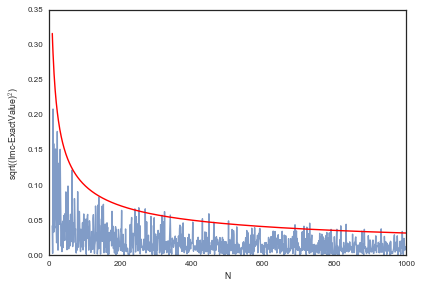

In [9]:
Imc=np.zeros(1000)
Na = np.linspace(0,1000,1000)

exactval= intf(b)-intf(a)

for N in np.arange(0,1000):
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # calculate f(x) 

    Imc[N]= (b-a) * np.sum(Y)/ N;
    
    
plt.plot(Na[10:],np.sqrt((Imc[10:]-exactval)**2), alpha=0.7)
plt.plot(Na[10:], 1/np.sqrt(Na[10:]), 'r')
plt.xlabel("N")
plt.ylabel("sqrt((Imc-ExactValue)$^2$)")


It seems that the error depends on the number of $N$ as $1/\sqrt{N}$. 



The Monte Carlo methods yield approximate
answers whose accuracy depends on the number of draws.
So far, we have used our knowledge of the exact value of various integrals to determine that the
error in the Monte Carlo method approaches zero as approximately $1/\sqrt{N}$ for large $N$, where $N$ is the number of trials. In the following, we will ﬁnd how to estimate the error when the exact answer is unknown. The $N$ dependence of the error is independent of the nature of the integrand and, most importantly, independent of the number of dimensions.

 Consider the Monte Carlo evaluation of the integral we saw above 
$ f(x)=x^2 + 4 \, x \,\sin(x)$  in the interval $[2,3]$ which takes the value 11.8113589251. We can estimate this as we did above example by comparing to the exact value. 
How can we estimate the error if the exact result is unknown? How can we know if $N = 10^5$ trials is sufficient to achieve the desired accuracy? Of course, we cannot answer these questions deﬁnitively because if the actual error in $\hat{I}$ were known, we could correct it  by the required
amount and obtain $I$. The best we can do is to calculate the probability that the true value $I$ is within a certain range centered on $\hat{I}$.

We can do this either analytically or by repeating the experiment $m$ times and determine an empirical distribution. From that we can estimate the confidence intervals. 

So, lets repeat the same evaluation $m$ times and check the variance of the estimate. 

11.8112248708 0.0039917173905


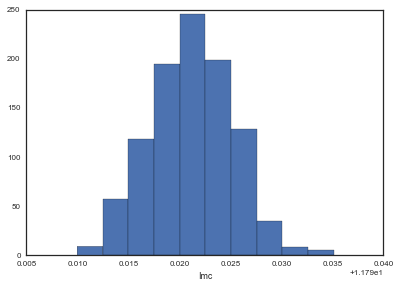

In [10]:
# multiple MC estimations
m=1000
N=10000
Imc=np.zeros(m)


for i in np.arange(0,m):
    
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 

    Imc[i]= (b-a) * np.sum(Y)/ N;
    
    
plt.hist(Imc)
plt.xlabel("Imc")
print np.mean(Imc), np.std(Imc)


One way to obtain an estimate for the error is to make  runs of $N$ trials each. Each run of $N$ trials yields a mean or measurement that we denote as $M_a$. As we shown above (and is expected)these measurements are not equal because each measurement uses a different finite sequence of random
numbers and inherently has an error itself. Qualitatively, the magnitude of
the differences between the measurements is similar to the actual errors per measurement, and hence these differences are a measure of the error associated with a single measurement. To obtain a quantitative measure
of this error, we determine the differences of these measurements using the standard deviation of the means $\sigma_m$ which is deﬁned as:

$$ \sigma_m= \langle M^2 \rangle- \langle M \rangle ^2 $$

where 

$$ \langle M \rangle = \frac{1}{m} \sum_{a=1}^{m} M_a $$

and

$$ \langle M^2 \rangle = \frac{1}{m} \sum_{a=1}^{m} M_a^2 $$


Although $\sigma_a$ gives an estimate of the probable error, this method of obtaining $\sigma_a$ by making additional measurements is impractical because we could have combined the additional measurements to make a better estimate.

One can show that:

$$ \sigma_m^2 \approx \frac{\sigma^2}{N} $$

where 

$$ \sigma^2= \langle f^2 \rangle - \langle f \rangle ^2 $$

which is the actual variance of the function (this will become very important later) 

Finally:
$$ \sigma_m^2 \approx \frac{\langle f^2 \rangle - \langle f \rangle ^2 }{N} $$


Therefore, in the Monte Carlo integration using $N$ samples, the error is
 
$$ \sigma_I =  \sqrt{\frac{\langle f^2\rangle- \langle f\rangle^2}{N}} .$$


which is the same for any dimensional space. 

One way to verify the relation  is to divide the initial measurement of $N$ trials into $s$ subsets. This procedure does not require additional measurements. We denote the mean value of
$f(x_i)$ in the $k$th subset by $S_k$. As an example, we divide the 10,000 trials of the ﬁrst measurement into $s = 10$ subsets of $N/s = 1000$ trials each.  A reasonable candidate for a measure
of the error is the standard deviation of the means of each subset. We denote this quantity as $\sigma_s$ where

$$ \sigma_s^2 = 	\langle S \rangle ^2 −	\langle S ^2 \rangle $$

where the averages now are over the subsets. Obviously we would like to
deﬁne an error estimate that is independent of how we subdivide the data. This quantity is not $\sigma_s$ but but the ratio $\sigma_s/s$ and when $s$ goes to $n$ we have the required results. 


## 4. Importance Sampling

Often the integrand has a very small value on a dominant fraction of the whole integration volume.
If the points are chosen evenly in the
integration volume, the small minority
of the points close to the `peak' give
the dominant contribution to the integral.

Importance sampling: choose the random
points so that more points are chosen around
the peak, less where the integrand is small.

For example lets look at the integral

$$ I = \int_V f(x) dV. $$

Choose a distribution $p(x)$, which is close to the function $f(x)$, but which is simple
enough so that it is possible to generate random $x$-values from this distribution.
The integral can now be re-written as:

$$ I = \int p(x) \frac{f(x)}{p(x)} dV $$

Therefore if we choose random numbers $x_i$ from distribution $p(x)$, we obtain

$$ I = \lim_{N\rightarrow \infty} \frac{1}{N} \sum_{x_{i}\sim p(.)} \frac{f(x_i)}{p(x_i)} $$

Another way of seeing this is since $f/p$ is flatter than $f$, the variance of $f/p$ is smaller that the variance of $f$ and therefore the error will be smaller for all $N$.

### Example: Calculate $\int_{0}^{\pi} \sin(x) \, x \, dx $

The function has a shape that is similar to Gaussian and therefore we choose here a Gaussian as importance sampling distribution. 


In [11]:
from scipy import stats
from scipy.stats import norm

mu = 2;
sig =.7;

f = lambda x: np.sin(x)*x
infun = lambda x: np.sin(x)-x*np.cos(x)
p = lambda x: (1/np.sqrt(2*np.pi*sig**2))*np.exp(-(x-mu)**2/(2.0*sig**2))
normfun = lambda x:  norm.cdf(x-mu, scale=sig)

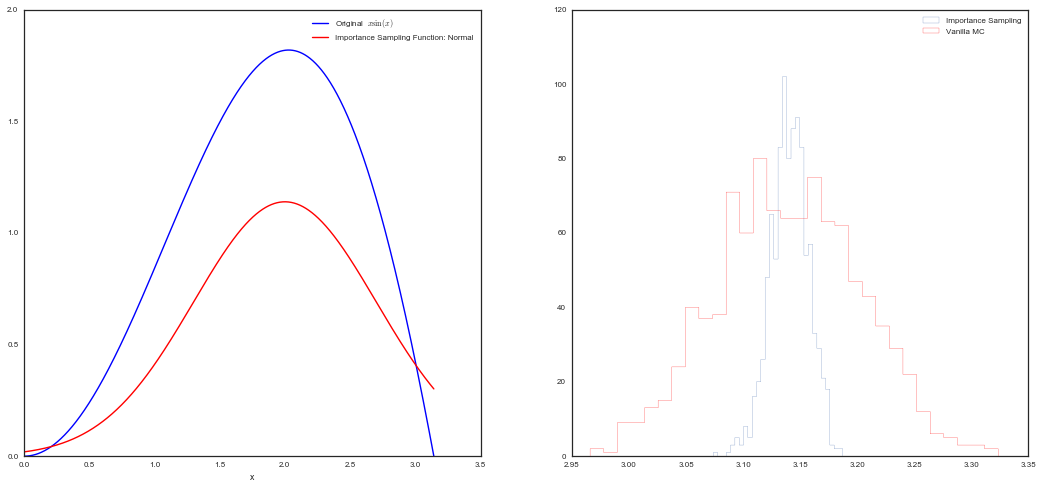

In [12]:
plt.figure(figsize=(18,8))  # set the figure size


# range of integration
xmax =np.pi 
xmin =0

# Number of draws 
N =1000

# Just want to plot the function
x=np.linspace(xmin, xmax, 1000)
plt.subplot(1,2,1)
plt.plot(x, f(x), 'b', label=u'Original  $x\sin(x)$')
plt.plot( x, 2*p(x), 'r', label=u'Importance Sampling Function: Normal')
plt.xlabel('x')
plt.legend()
# =============================================
# EXACT SOLUTION 
# =============================================
Iexact = infun(xmax)-infun(xmin)

# ============================================
# VANILLA MONTE CARLO 
# ============================================
Ivmc = np.zeros(1000)
for k in np.arange(0,1000):
    x = np.random.uniform(low=xmin, high=xmax, size=N)
    Ivmc[k] = (xmax-xmin)*np.mean( f(x))


# ============================================
# IMPORTANCE SAMPLING 
# ============================================
# CHOOSE Gaussian so it similar to the original functions

Iis = np.zeros(1000)
for k in np.arange(0,1000):
    # DRAW FROM THE GAUSSIAN mean =2 std = sqrt(0.7) 
    xis = mu + sig*np.random.randn(N,1);
    #hist(x)
    xis = xis[ (xis<xmax) & (xis>xmin)] ;

    # normalization for gaussian from 0..pi
    normal = normfun(np.pi)-normfun(0);


    Iis[k] =np.mean(f(xis)/p(xis))*normal;


plt.subplot(1,2,2)
plt.hist(Iis,30, histtype='step', label=u'Importance Sampling');
plt.hist(Ivmc, 30, color='r',histtype='step', label=u'Vanilla MC');

 
plt.legend()
 
 
 

### 5. Using Monte Carlo for probability distributions

We have introduced the concept of randomly throwing stones or 
randomly selecting pairs. In this lecture we will explore 
how computers generate random numbers. 

Randomness means lack of correlation. For a sequence of numbers $r={r_1, r_2, \ldots, r_n}$ 
we can define randomness as an asymptotic property of the series as $N \rightarrow \infty$. 
Since this is a hopeless task we can test randomness with a various tests described below. 

Long sequences of random numbers are needed in numerous applications,
in particular methods which utilize random numbers such as Monte Carlo simulation techniques, stochastic optimization, cryptography
calculations that simulate naturally random processes (e.g. thermal motion or radioactive decay). 
All these methods require fast and reliable random number sources.

Many physical processes are random by nature and such processes can be used to
produce random numbers. Examples are noise in semiconductor devices or throwing a dice.
On the other hand computers are deterministic machines and because of that, they can not generate truly random numbers. 

In practice, random numbers are generated by pseudorandom number generators.
These are deterministic algorithms, and consequently the generated numbers are only "pseudo-random" and have their limitations. 
But for many applications, pseudorandom numbers can be successfully used to approximate real random
numbers.

Lets say that the probability of a random number to occur is $P(r)$ and that means 
the probability of finding $r_i$ in the interval $[r_j, r_j+dr]$ is $P(r)dr$. 
A uniform distribution means that P(r) is constant and that means all numbers are equally likely to occur.
Not all random sequences are uniform. In other distributions (Normal, Poisson etc) not all numbers are equally likely to occur.

### Inverse Transform

Consider a change of variables $r\rightarrow x$ such as if $r$ are
uniformly distributed, $u(r)=const$, then the probability distribution $w(x)$ is what we desire.
For the probability to be conserved on the transformation

$$ u(r) \, dr = w(x) \, dx \Rightarrow w(x) = \left| \frac{dr}{dx} \right| \, u(r) $$

To find the mapping from $x$ to $r$ we calculate the cumulative 
distribution function (CDF) of both probability distributions, from $0$ to $r$ and -$\infty$ to $x$ respectively, and since that is not decreasing 

$$ \int_{0}^{r} u(r') dr' = r =  \int_{-\infty}^{x} w(x) \, dx =F(x) $$

After the integral of the target function from -$\infty$ to $x$ (or the CDF until $x$, $F(x)$) is 
evaluated, we solve for $x$ yielding a new equation $x=F^{-1}(r)$. 
To generate numbers that follow
$w(x)$ therefore, we draw from the uniform distribution and 
we apply the transformation $x=F^{-1}(r)$. 

 For example, lets assume we would like
to generate random numbers that follow the exponential distribution
$w(x) = \frac{1}{\lambda} e^{-x/\lambda}$ for $x\ge0$ and $w(x)=0$ 
otherwise. Following the recipe from above

$$ r = \int_{0}^{x} \frac{1}{\lambda} e^{-x'/\lambda} dx'  = 1- e^{-x/\lambda} $$ 

Solving for $x$ 
$$ x = - \lambda \ln (1-r) $$

###Example: Draw from the distribution $f(x) \sim \exp{(-x)}$

The following code will produce numbers that follow the $\exp{(-x)}$ distribution. The figure
generated by code below shows the resulting histogram of the generated numbers
compared to the actual $\exp{(-x)}$.

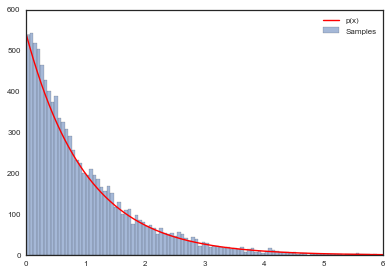

In [13]:
# probability distribution we're trying to calculate
p = lambda x: np.exp(-x)

# CDF of p
CDF = lambda x: 1-np.exp(-x)

# invert the CDF
invCDF = lambda x: -np.log(1-x)

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 6 # the upper limit of our domain

# range limits
rmin = CDF(xmin)
rmax = CDF(xmax)

N = 10000 # the total of samples we wish to generate

# generate uniform samples in our range then invert the CDF
# to get samples of our target distribution
R = np.random.uniform(rmin, rmax, N)
X = invCDF(R)

# get the histogram info
hinfo = np.histogram(X,100)

# plot the histogram
plt.hist(X,bins=100, label=u'Samples', alpha=0.5);

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*p(xvals), 'r', label=u'p(x)')

# turn on the legend
plt.legend()

###Rejection Method

This method follows the basic idea of the hit or miss method described above

A simple method for generating random points with distribution
$w(x)$ was deduced by  von Neumann. The idea is extremely 
simple. In one dimension, if you have a function with known everywhere on a specific domaing (i.e. $[x_{min}\, x_{max}]$ and with a known supremum $M$ over that domain, you can sample from it as follows:

<div id="picture">
<figure>
		<img width="400" align="middle" src="./Lecture03_data/Rejection.png">
        <figcaption>  Basic rejection method</figcaption>
</figure>
</div>

One draws a pair of random numbers, $x,y$ and 
then compares if $y$ is above or below the target distribution
$w(x)$.

+ Draw $x$ uniformly from $[x_{min}\, x_{max}]$
+ Draw $y$ uniformly from [0,$M$]
+ if $y$ < w($x$), accept the sample
+ otherwise reject it
+ repeat

**Example**

The following code produces samples that follow the distribution $P(x)=e^{-x}$ 
  for $x=[0,10]$ and generates a histogram of the sampled distribution. 

99564 10000


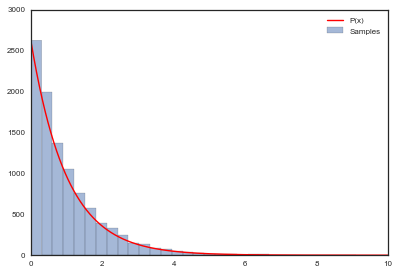

In [14]:
P = lambda x: np.exp(-x)

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 10 # the upper limit of our domain

# range limit (supremum) for y
ymax = 1

N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # pick a uniform number on [xmin, xmax) (e.g. 0...10)
    x = np.random.uniform(xmin, xmax)
    
    # pick a uniform number on [0, ymax)
    y = np.random.uniform(0,ymax)
    
    # Do the accept/reject comparison
    if y < P(x):
        samples[accepted] = x
        accepted += 1
    
    count +=1
    
print count, accepted

# get the histogram info
hinfo = np.histogram(samples,30)

# plot the histogram
plt.hist(samples,bins=30, label=u'Samples', alpha=0.5);

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*P(xvals), 'r', label=u'P(x)')

# turn on the legend
plt.legend()

### Rejection Sampling on Steroids

The simple rejection sampling method above suffers from some fundamental problems.  For our simple example, it's quite easy to determine the supremum.  In practice, while you may know how to quickly (i.e. constant time) evaluate your function everywhere on the domain of interest, finding a bound very close to the  supremum may not be a feasible calculation.  In addition, even if you find a tight bound for the supremum, basic rejection sampling will still be very inefficient in that you will reject many samples (especially in low density regions or ldrs).  While other techniques will be required to really address this problem, it is still possible to somewhat do a more efficient job while still taking advantage of the simplicity of rejection sampling.  Our modified technique will introduce a _proposal density_ $g(x)$.  The proposal density will have the following characteristics:

+ $g(x)$ is easy to sample from and (calculate the pdf)
+ Some $M$ exists so that $M \, g(x) > f(x)$ in your entire domain of interest
+ ideally $g(x)$ will be somewhat close to $f$ so that you'll sample more in high density regions  and much less in low density regions
+ N.B. an optimal value for M is the supremum over your domain of interest of $f/g$

Once you've picked a proposal distribution g, your modified rejection sampling technique is as follows:

+ Draw $x$ from your proposal distribution $g(x)$
+ Draw $y$ uniformly from [0,1]
+ if $y$ < w($x$)/$M g(x)$, accept the sample
+ otherwise reject it
+ repeat


**Example**

The following code produces samples that follow the distribution $P(x)=e^{-x}$ 
  for $x=[0,10]$ and generates a histogram of the sampled distribution.

23861 10000


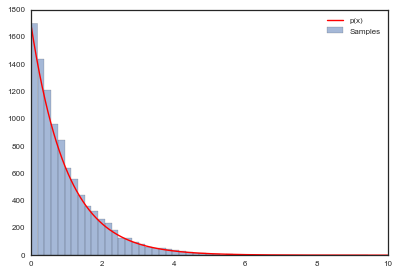

In [15]:

p = lambda x: np.exp(-x)  # our distribution
g = lambda x: 1/(x+1)  # our proposal pdf (we're thus choosing M to be 1)
invCDFg = lambda x: np.log(x +1) # generates our proposal using inverse sampling

# domain limits
xmin = 0 # the lower limit of our domain
xmax = 10 # the upper limit of our domain

# range limits for inverse sampling
umin = invCDFg(xmin)
umax = invCDFg(xmax)

N = 10000 # the total of samples we wish to generate
accepted = 0 # the number of accepted samples
samples = np.zeros(N)
count = 0 # the total count of proposals

# generation loop
while (accepted < N):
    
    # Sample from g using inverse sampling
    u = np.random.uniform(umin, umax)
    xproposal = np.exp(u) - 1
    
    # pick a uniform number on [0, 1)
    y = np.random.uniform(0,1)
    
    # Do the accept/reject comparison
    if y < p(xproposal)/g(xproposal):
        samples[accepted] = xproposal
        accepted += 1
    
    count +=1
    
print count, accepted

# get the histogram info
hinfo = np.histogram(samples,50)

# plot the histogram
plt.hist(samples,bins=50, label=u'Samples', alpha=0.5);

# plot our (normalized) function
xvals=np.linspace(xmin, xmax, 1000)
plt.plot(xvals, hinfo[0][0]*p(xvals), 'r', label=u'p(x)')

# turn on the legend
plt.legend()


### Box-Muller algorithm

In many cases the integral to calculate the CDF may not be easy to calculate analytically
and we need to come with clever algorithms. For example 
there is no closed form formula for the integral of the normal distribution
$ I=\frac{1}{2\pi} \int_{-\infty}^{x} e^{-x'^2/2}dx' $.

The Box Muller method is a brilliant trick to overcome this by producing two independent standard normals
from two independent uniforms. It is based on the familiar trick for calculating this integral:

$$ I^2 = \int_{-\infty}^{\infty} e^{-x'^2/2}dx' \int_{-\infty}^{\infty} e^{-y'^2/2}dy'  = \int_{-\infty}^{\infty}  \int_{-\infty}^{\infty}  e^{(x^2+y^2)/2} dx dy $$

This  integral can be calculated using polar coordinates $x = r \cos(\theta), y = r \sin(\theta)$ with area element $dxdy = rdrd\theta$, so that

$$ I^2 = \int_{r=0}^{\infty} \int_{\theta=0}^{2\pi} e^{-r^2/2} r dr d\theta = 2\pi \int_{r=0}^{\infty} e^{-r^2/2} r dr $$

Substituting $s=r^2/2$ gives $ds=r dr$ and 

$$ I^2 = 2\pi\int_{s=0}^{\infty} e^{-s} ds = 2\pi $$

Now, lets look at the integral of the distribution on $r$ where $r$ is defined above
and then use the inverse trick. 

$$ U =\int_{r'=0}^{r} \int_{\theta=0}^{2\pi}  \frac{1}{2\pi} e^{-r'2/2} \, r'  dr' d\theta  = I^2 (x,y) $$

Using the same variable transformation $s=r^2/2$ we can show 

$$ U = \int_{s=0}^{r^2/2} e^{-s}\, ds = 1 - e^{-r^2/2} $$

where $U$ is the uniformly distributed variable. (We have changed the notation
since $r$ is now used for radius). Notice that since $r$ goes from $[0,\infty]$, $U$ is uniformly distributed on $[0,1]$, and no rescaling is required.

We can solve for $r$
but it is easier first to observe that $U_1 = 1-U$ is also 
uniformly  distributed. Therefore we can solve the following equation:

$$  1 - e^{-r^2/2} = 1-U_1 $$
and find $r$ as a function of $U_1$. 

$$ r = \sqrt{-2 \ln{U_1}} $$

Also note that $\theta$ is uniformly distributed from 0 to $2\pi$ and 
$$ \theta = 2\pi U_2 $$


Altogether, the Box Muller method takes 
independent standard uniform random variables $U1$ and $U2$ and produces independent standard normals $x$ and $y$ using the formulas 

$$ \theta = 2\pi U_2 \hspace{1cm} r=\sqrt{- 2\ln{U_1}} \hspace{1cm}  x= r \cos{\theta} \hspace{1cm}  y= r \sin{\theta} $$


# Appendix: Random Number Generation

##  Random Number Generators

Once we understand and want to sample or simulate randomness, then in general we'd like to start with a uniform distribution.  Not only is this the most practical and common distribution to sample from, but (as much of the lecture explains) once we can sample from the uniform distribution, techniques abound to sample from other distributions. 

### Infinite Coin Flips

Now the most basic distribution to simulate or sample is the Bernouli.  Why?  Well, we're very good at flipping coins (or in general discretizing continuous events to get binary results).  Once we can flip coin we can simulate a uniform distribution as follows.  In order to get a sample _a_ from a uniform distribution

+ Keep a count _n_ initialized to 0
+ Flip a coin _c_
+ Let the nth place of the binary decimal expansion of _a_ be the result of the coin flip
+ increment _n_
+ repeat

We know from real analysis that (with some careful attention to details like potentially discarding all infinitely repeating fractions) we will end up with a uniform sample from [0, 1)

### Linear Congruential Generator
Unfortunately, we're not imortal and don't have infinite time.  Moreover, even if we did, we probably would rather spend that time doing things other than simulating __ONE__ uniform random variable.  Fortunately other, more efficient methods exist to sample from a uniform distribution.  One such method is the linear congruential generator.


The Linear congruential geneator is based on a integer recursive relation 

$$ r_{i+1} = (a \, r_i +c) \, {\rm mod} \, M  $$

where  $a, c$ and $M$ are constants. This generates a sequence $r_1, r_2, \ldots$ of random
integers which are distributed between $[0,M-1]$ (if $c>0$) or between $[1,M]$ (if $c = 0$). Each $r_i$
is scaled to the interval $(0,1)$ by dividing by $M$. The parameter $M$ is usually
equal or nearly equal to the largest integer of the computer. This determines the period $P$
of the generator and $P< M$. 
The first number in the sequence $r_1$ is an input and it is called the **seed**.

If $c\neq 0$, the period of the generator is equal to $M$ if and only if

+ $c$ is relatively prime to $M$ (find the greatest common divisor)
+ $a-1$ is a multiple of every prime number that divides $M$ and
+ $a -1$ is a multiple of 4 if $M$ is a multiple of 4

If $M > 2$ is a prime number,
+ the maximum possible period is $M-1$ and
+ the maximum period is achieved if $a \,\,{\rm mod} \,\,M \neq 0$ and
 $a^{M-1}/q \,\,{\rm mod} \,\, M \neq 1$  for every prime divisor $q$ of $M-1$.

### Properties of Random Numbers
In practice, random number generator algorithms are implemented in the computer and
the numbers are generated while a computer program is running. 

Computer random number generators produce uniformly distributed 
numbers in the range $[0,1]$. We will see below how to generate other distributions
starting from the uniform. 

A 'good' random number generator has the following properties:

+ The numbers must have the correct distribution. Since most of the random number generators
meant to produce a uniform distributions  that means the distribution should be uniform. 
+ The period of the sequence should be longer than the numbers necessary for the application. All random number generators will repeat the same sequence of numbers eventually, but it is important
that the sequence is sufficiently long.
+ The sequence is uncorrelated.


There are many tests that test the quality of the random number generator. 

+ Visual inspection. A good test is to plot the consecutive sub series
$r_{i \in {\rm even}},  r_{i \in {\rm odd}} $ as a scatter plot. Figure 1 shows a good random number sequence where Figure 2 shows
a sequence with repetition.

<div id="picture">
<figure>
		<img width="400" align="middle" src="./Lecture03_data/GoodRandom.png">
        <figcaption> A good random number generator </figcaption>
</figure>
</div>
<div id="picture">
<figure>
		<img width="400" align="middle" src="./Lecture03_data/BadRandom.png">
        <figcaption> A bad random number generator </figcaption>
</figure>
</div>

+ Moment tests. The moments of a uniform distribution 
$$ \frac{1}{N} \sum_{i=1}^{N} r_i^k = \int x^k \, P(x) dx +O(1/\sqrt{N}) \approx \frac{1}{k+1} $$
The random sequence should converge to $1/(k+1)$ as $N\rightarrow \infty$. 
+Correlation test. Check the autocorrelation of the series. This should 
have no correlation above the noise for all lags. 
+ The spectral test. The power spectrum of the series should be flat.
+ Diehard Battery of Tests of Randomness. http://stat.fsu.edu/pub/diehard/
+ My favorite one. http://www.iro.umontreal.ca/~simardr/testu01/tu01.html

